In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pd
import seaborn as sns

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [7]:
#a)
#Your code:
import pandas
house_sales_data = pandas.read_csv('kc_house_data.csv')
print(house_sales_data.head())
print(house_sales_data.dtypes)

#Hint: read_csv(), head()

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [29]:
#b) 

house_numerical_df = house_sales_data.select_dtypes(include=['int64', 'float64'])#numeryczna czesc
categorical_vars = house_sales_data.select_dtypes(include=['object'])#kategoryczna czesc(obiekty)

print(house_numerical_df.columns.tolist(),categorical_vars.columns.tolist())#wypisanie nazw 




['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] ['date']


In [4]:
#c)
#Your code:

describe=house_numerical_df.describe()#podstawowa statystyka
print(describe)
#Hint: Function describe()

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

Text(0.5, 1.0, 'Relacja między ceną a powierzchnią mieszkalną')

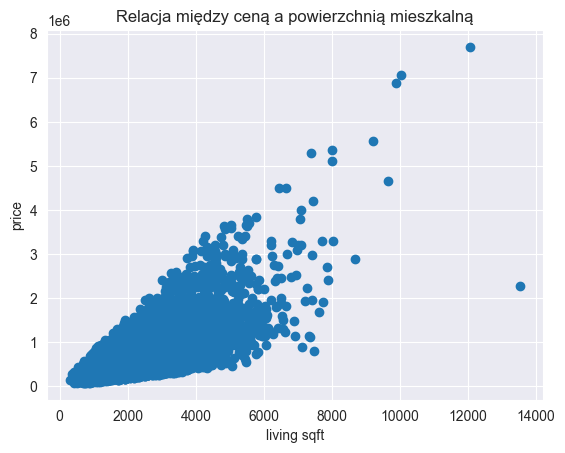

In [5]:
#a)
#Your code:

plt.scatter(house_numerical_df['sqft_living'],house_numerical_df['price'])
plt.xlabel('living sqft')
plt.ylabel('price')
plt.title('Relacja między ceną a powierzchnią mieszkalną')
#Hint plt.scatter

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64


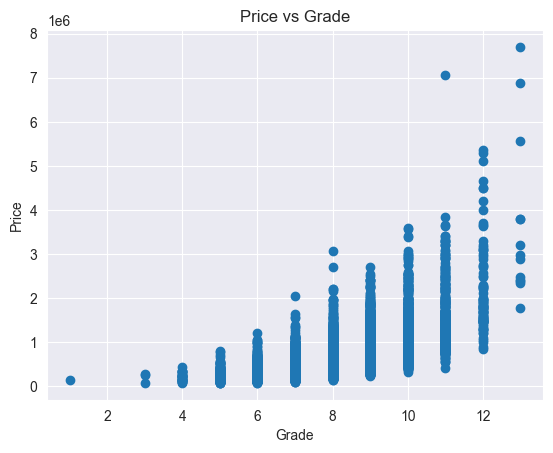

In [6]:
#b)
dane_do_korelacji=house_sales_data

numerical_columns = dane_do_korelacji.select_dtypes(include=['int64', 'float64'])
korelacja = numerical_columns.corr()
print(korelacja['price'])

plt.scatter(dane_do_korelacji['grade'], dane_do_korelacji['price'])
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Price vs Grade')
plt.show()




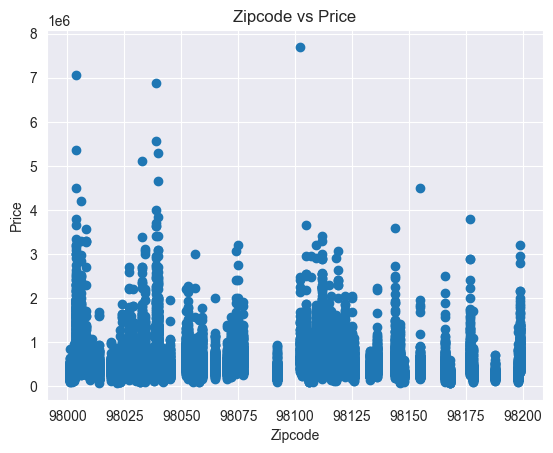

In [7]:
plt.scatter(dane_do_korelacji['zipcode'],dane_do_korelacji['price'])
plt.ylabel('Price')
plt.xlabel('Zipcode')
plt.title('Zipcode vs Price')
plt.show()

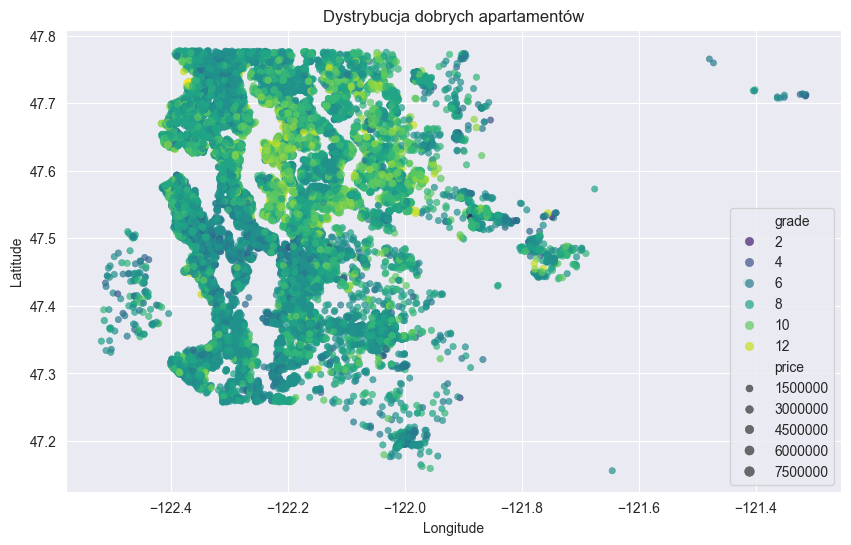

In [8]:
#print(house_sales_data.loc[house_sales_data['grade'].idxmin()])
good_grade_apartments = house_sales_data[house_sales_data['grade']>=0]

plt.figure(figsize=(10, 6))#rozmiar wykresu

# Scatter plot: longitude vs latitude with color representing 'grade'
sns.scatterplot(data=good_grade_apartments,
                x='long',
                y='lat',
                hue='grade',  # Color by grade
                size='price', # Optionally, size by price to show more info on the plot
                palette="viridis",  # Choose a color palette, e.g., 'viridis'
                sizes=(20, 50),    # Scaling of the points by price
                alpha=0.7,          # Transparency to visualize overlaps
                edgecolor=None)

# Adding title and labels for better understanding
plt.title('Dystrybucja dobrych apartamentów')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()



## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

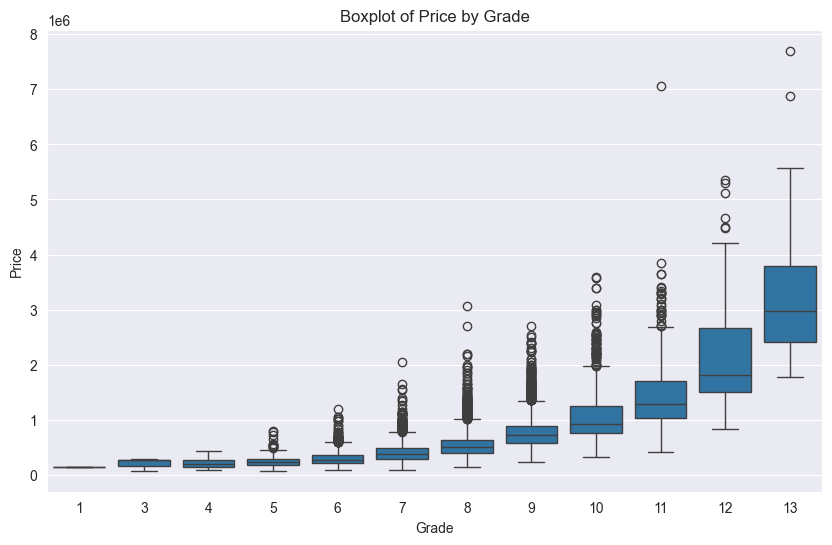

In [18]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price',data=numerical_columns) #tutaj do poprawy poniewaz kategoryczne i numeryczne, poniewaz numeryczne to nie same liczby tylko dane
                                                         #liczbowe ktore jest sens liczyc a kategoryczne to takie liczby ktore nie maja sensu liczyc albo string
                                                         #wiec sobie podstawie tutaj po prostu pierwody df
# Add title and labels
plt.title('Boxplot of Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()



#Hint: plt.boxplot

<Figure size 1000x600 with 0 Axes>

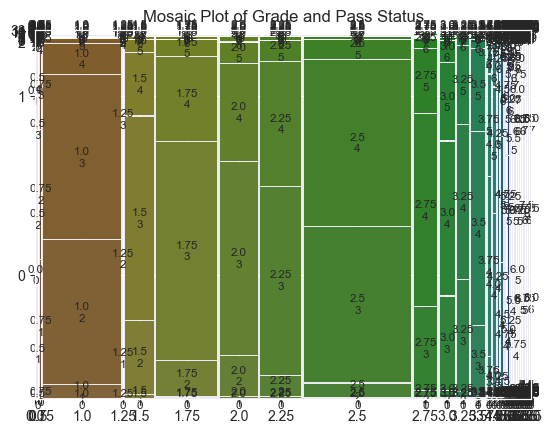

In [34]:
#b)
from statsmodels.graphics.mosaicplot import mosaic
import pandas


contingency_table = pandas.crosstab(house_sales_data['bathrooms'], house_sales_data['bedrooms'])
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), title='Mosaic Plot of Grade and Pass Status')

# Show the plot
plt.show()






## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [23]:
#a)
#Your code:
dane=house_sales_data.loc[(house_sales_data['bedrooms']==3) & (house_sales_data['bathrooms']==2) & (house_sales_data['floors']==2)]#warunki filtracji 3 sypialnie, 2 lazienki, 2 pietra
dane.head()
#Hint: pandas.DataFrame.loc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16,1875500060,20140731T000000,395000.0,3,2.0,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
150,3362900810,20140820T000000,532170.0,3,2.0,1360,3090,2.0,0,0,...,8,1360,0,1990,0,98103,47.6838,-122.353,1500,3090
294,9297300045,20140709T000000,550000.0,3,2.0,1970,4166,2.0,0,3,...,8,1270,700,1929,0,98126,47.5717,-122.375,2390,4166
365,723099065,20150130T000000,465000.0,3,2.0,1840,40438,2.0,0,0,...,7,1840,0,1994,0,98045,47.4853,-121.709,1380,44049
462,8944290160,20141104T000000,230000.0,3,2.0,1510,3413,2.0,0,0,...,7,1510,0,1985,0,98031,47.3912,-122.167,1570,3777


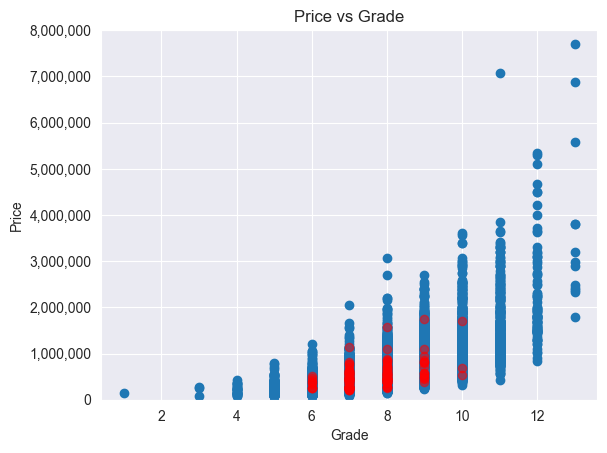

In [27]:
plt.scatter(house_sales_data['grade'], house_sales_data['price'])
plt.scatter(dane['grade'], dane['price'], label="Wybog lazienek pieter i toalet", color='red', alpha=0.5)
#nalozenie na siebie wykresow poczatkowego data frame i tego z warunkami na czerwono (komorka powyzej)
plt.ylim(0, 8000000)  # Zakres osi y od 0 do 8 milionów


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Formatowanie osi y zeby nie pokazywalo 1.8m
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Price vs Grade')
plt.show()




In [31]:
house_sales_data['cena_za_metr'] = house_sales_data['price'] / house_sales_data['sqft_living']
house_sales_data.sort_values(by='cena_za_metr', ascending=True).head()


#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_to_footage_ratio,cena_za_metr
18262,2891000610,20141211T000000,148900.0,4,1.75,1700,6000,1.0,0,0,...,0,1967,0,98002,47.3252,-122.208,1280,6000,87.588235,87.588235
3785,723049156,20140523T000000,149000.0,3,1.00,1700,8645,1.0,0,0,...,0,1955,0,98146,47.4899,-122.337,1500,7980,87.647059,87.647059
13825,5637200450,20141017T000000,257000.0,5,2.75,2930,10148,2.0,0,0,...,0,2002,0,98059,47.4887,-122.145,2930,8425,87.713311,87.713311
17197,5111400086,20140512T000000,110000.0,3,1.00,1250,53143,1.0,0,0,...,0,1945,0,98038,47.4235,-122.051,1820,217800,88.000000,88.000000
1385,3342700465,20150123T000000,250000.0,3,1.50,2840,10182,1.0,0,0,...,1330,1951,0,98056,47.5240,-122.200,2210,9669,88.028169,88.028169
